In [1]:
import  pandas as pd
import numpy as np

In [2]:
np.set_printoptions(precision=4,linewidth=100)

In [3]:
country_df = pd.read_csv('Data/country.csv')

In [4]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
Country             20 non-null object
Corruption_Index    20 non-null int64
Gini_Index          20 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 608.0+ bytes


In [5]:
import statsmodels.api as sm

In [7]:
X = sm.add_constant(country_df['Gini_Index'])

C:\Users\Dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [8]:
print(X)

    const  Gini_Index
0     1.0        53.7
1     1.0        30.2
2     1.0        46.2
3     1.0        32.7
4     1.0        36.5
5     1.0        27.6
6     1.0        23.5
7     1.0        31.6
8     1.0        33.7
9     1.0        30.7
10    1.0        25.4
11    1.0        27.5
12    1.0        30.1
13    1.0        40.8
14    1.0        40.1
15    1.0        34.2
16    1.0        34.0
17    1.0        42.7
18    1.0        34.2
19    1.0        39.4


In [44]:
Y = country_df['Corruption_Index']
print(Y)

0     77
1     53
2     40
3     47
4     38
5     75
6     85
7     81
8     82
9     81
10    88
11    90
12    69
13    74
14    29
15    62
16    48
17    36
18    44
19    35
Name: Corruption_Index, dtype: int64


In [11]:
from sklearn.model_selection import train_test_split

In [13]:
train_x ,test_x,train_y,test_y = train_test_split(X,Y,train_size= 0.8,random_state =80)

In [14]:
country_lm = sm.OLS(train_y,train_x).fit()

In [15]:
country_lm.params

const         103.268712
Gini_Index     -1.232151
dtype: float64

In [17]:
country_lm.rsquared

0.19931835726999625

In [26]:
r2_df = pd.DataFrame() 
r2_df['I'] = []
r2_df['r2'] = [] 
for i in range(1,100):
    train_x ,test_x,train_y,test_y = train_test_split(X,Y,train_size= 0.8,random_state =i)
    country_lm = sm.OLS(train_y,train_x).fit()
    r2_df.loc[i]=list([i,country_lm.rsquared])
    

In [27]:
import matplotlib.pyplot
import seaborn as sn

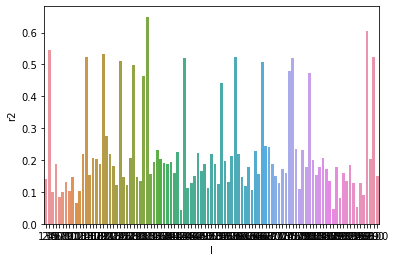

In [28]:
sn.barplot(x='I',y='r2',data=r2_df)

In [29]:
r2_filter = r2_df[r2_df['r2']>0.5]

In [30]:
print(r2_filter)

       I        r2
2    2.0  0.546013
13  13.0  0.523806
18  18.0  0.532765
23  23.0  0.509714
31  31.0  0.649742
42  42.0  0.521188
57  57.0  0.524498
65  65.0  0.508957
74  74.0  0.521188
96  96.0  0.603709
98  98.0  0.523200


In [36]:
train_x ,test_x,train_y,test_y = train_test_split(X,Y,train_size= 0.8,random_state =31)

In [37]:
country_lm = sm.OLS(train_y,train_x).fit()

In [38]:
country_lm.params

const         156.93947
Gini_Index     -2.90628
dtype: float64

In [40]:
country_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.625   
Dependent Variable: Corruption_Index AIC:                130.8238
Date:               2020-09-06 12:40 BIC:                132.3689
No. Observations:   16               Log-Likelihood:     -63.412 
Df Model:           1                F-statistic:        25.97   
Df Residuals:       14               Prob (F-statistic): 0.000163
R-squared:          0.650            Scale:              185.33  
-----------------------------------------------------------------
                Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
-----------------------------------------------------------------
const          156.9395  19.4933  8.0510 0.0000 115.1305 198.7484
Gini_Index      -2.9063   0.5703 -5.0961 0.0002  -4.1294  -1.6831
-----------------------------------------------------------------
Omnibus:              3.648        Durbin-Watson:           2.262
Prob(Omnibus):        0.161        Jarque-Bera (JB):        1.468
Skew:                 0.331        Prob(JB):                0.480
Kurtosis:             1.672        Condition No.:           196  
=================================================================

"""

In [41]:
country_lm.conf_int(0.05)

,0,1
const,115.130537,198.748403
Gini_Index,-4.129433,-1.683126


In [42]:
pred_y = country_lm.predict(test_x)

In [43]:
print(pred_y)

15    57.544711
0      0.872260
5     76.726155
13    38.363266
dtype: float64


In [45]:
from sklearn import metrics

In [48]:
np.abs(metrics.r2_score(pred_y,test_y))

1.2540409258009957

In [49]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [50]:
country_resid =country_lm.resid 

In [52]:
probplot = sm.ProbPlot(country_resid)

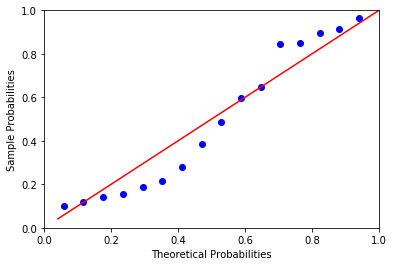

<Figure size 576x432 with 0 Axes>

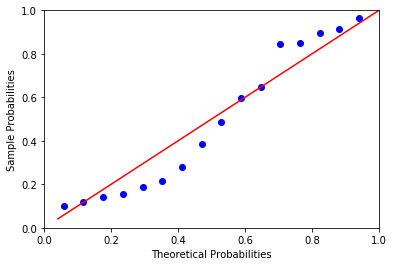

In [53]:
plt.figure(figsize=(8,6))
probplot.ppplot(line='45')